# Apple stock Price Analysis

## Data cleaning

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from plotly.offline import iplot
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from statsmodels.tsa.arima.model import ARIMA
from IPython.display import HTML
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
df = pd.read_csv('/content/AAPL.csv')

In [ ]:
df.head(10)

Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100600  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.095352  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.088353  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090540   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.093165   73449600
5  1980-12-19  0.126116  0.126674  0.126116  0.126116   0.098851   48630400
6  1980-12-22  0.132254  0.132813  0.132254  0.132254   0.103662   37363200
7  1980-12-23  0.137835  0.138393  0.137835  0.137835   0.108036   46950400
8  1980-12-24  0.145089  0.145647  0.145089  0.145089   0.113722   48003200
9  1980-12-26  0.158482  0.159040  0.158482  0.158482   0.124219   55574400

In [ ]:
df.tail(10)

Date        Open        High         Low       Close   Adj Close  \
10262  2021-08-25  149.809998  150.320007  147.800003  148.360001  148.360001   
10263  2021-08-26  148.350006  149.119995  147.509995  147.539993  147.539993   
10264  2021-08-27  147.479996  148.750000  146.830002  148.600006  148.600006   
10265  2021-08-30  149.000000  153.490005  148.610001  153.119995  153.119995   
10266  2021-08-31  152.660004  152.800003  151.289993  151.830002  151.830002   
10267  2021-09-01  152.830002  154.979996  152.339996  152.509995  152.509995   
10268  2021-09-02  153.869995  154.720001  152.399994  153.649994  153.649994   
10269  2021-09-03  153.759995  154.630005  153.089996  154.300003  154.300003   
10270  2021-09-07  154.970001  157.259995  154.389999  156.690002  156.690002   
10271  2021-09-08  156.979996  157.039993  153.979996  155.110001  155.110001   

         Volume  
10262  58991300  
10263  48597200  
10264  55721500  
10265  90956700  
10266  86453100  
10267  80313700  
10268  71115500  
10269  57808700  
10270  82278300  
10271  74347200

In [ ]:
df.describe()

Open          High           Low         Close     Adj Close  \
count  10272.000000  10272.000000  10272.000000  10272.000000  10272.000000   
mean      12.006819     12.134860     11.877629     12.011191     11.420584   
std       25.111332     25.388548     24.833693     25.123982     24.816645   
min        0.049665      0.049665      0.049107      0.049107      0.038490   
25%        0.276786      0.284375      0.270089      0.276964      0.232579   
50%        0.456451      0.464286      0.446987      0.455357      0.378405   
75%       12.687857     12.825715     12.579017     12.687143     10.893390   
max      156.979996    157.259995    154.389999    156.690002    156.690002   

             Volume  
count  1.027200e+04  
mean   3.353832e+08  
std    3.404297e+08  
min    0.000000e+00  
25%    1.273552e+08  
50%    2.233742e+08  
75%    4.177250e+08  
max    7.421641e+09

Null values?

In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There's no null values. It's great.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10272 entries, 0 to 10271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10272 non-null  object 
 1   Open       10272 non-null  float64
 2   High       10272 non-null  float64
 3   Low        10272 non-null  float64
 4   Close      10272 non-null  float64
 5   Adj Close  10272 non-null  float64
 6   Volume     10272 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 561.9+ KB


Date column is not in correct format

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
type(df.loc[0,'Date'])

pandas._libs.tslibs.timestamps.Timestamp

There's one column seems to be redundant, it's **Adj Close** and I need to inspect it

In [ ]:
df['Adj Close'].unique()

array([1.00600000e-01, 9.53520000e-02, 8.83530000e-02, ...,
       1.54300003e+02, 1.56690002e+02, 1.55110001e+02])

This column can be easily droped

In [ ]:
df.drop(columns='Adj Close', inplace=True)

In [ ]:
df.set_index("Date", inplace=True) #  Setting the 'Date' column as index

In [ ]:
apple_df = df.drop(columns='Volume')
volume = df['Volume']

## Data visualizations

In [ ]:

# Creating subplots
fig = make_subplots(rows=3, cols=1, subplot_titles=['Open', 'High', 'Low'])

fig.add_trace(go.Scatter(x=apple_df.index, y=apple_df['Open'], name='Open',
                         line=dict(color='deepskyblue')), row=1, col=1)

fig.add_trace(go.Scatter(x=apple_df.index, y=apple_df['High'], name='High',
                         line=dict(color='salmon')), row=2, col=1)

fig.add_trace(go.Scatter(x=apple_df.index, y=apple_df['Low'],
                         name='Low', line=dict(color='lightgreen')), row=3, col=1)

fig.update_layout(
    showlegend=False,
    title_text="OVERALL APPLE STOCKS",
    title_x=0.5,
    height=1200,
    width=800,
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="black"
    )
)

# Method 1: Using plotly.io to display the figure
pio.show(fig)

# Method 2: Using plotly.offline.iplot to render as HTML
iplot(fig)

# Method 3: Save as HTML and display in Colab using HTML function
pio.write_html(fig, file='apple_stocks.html')
HTML(filename='apple_stocks.html')

Output hidden; open in https://colab.research.google.com to view.

General tendency is that stocks are increasing

## Analysis years between 1980 and 2000

In [ ]:
years_1980_2000 = apple_df[(apple_df.index.year >= 1980) & (apple_df.index.year <= 1999)]

fig = make_subplots(rows=3, cols=1, subplot_titles=['Open', 'High', 'Low'])

fig.add_trace(go.Scatter(x=years_1980_2000.index, y=years_1980_2000['Open'], mode='lines',
                         line=dict(color='deepskyblue')), row=1, col=1)

fig.add_trace(go.Scatter(x=years_1980_2000.index, y=years_1980_2000['High'], mode='lines',
                         line=dict(color='salmon')), row=2, col=1)

fig.add_trace(go.Scatter(x=years_1980_2000.index, y=years_1980_2000['Low'], mode='lines',
                         line=dict(color='lightgreen')), row=3, col=1)

fig.update_layout(
    showlegend=False,
    title_text="APPLE STOCKS IN YEARS 1980 - 1999",
    title_x=0.5,
    height=1200,
    width=800,
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="black"
    )
)

# Method 1: Using plotly.io to display the figure
pio.show(fig)

# Method 2: Using plotly.offline.iplot to render as HTML
iplot(fig)

# Method 3: Save as HTML and display in Colab using HTML function
pio.write_html(fig, file='apple_stocks_1980_1999.html')
HTML(filename='apple_stocks_1980_1999.html')


Output hidden; open in https://colab.research.google.com to view.

There's considerable increase at the beggining of 1999

## Years between 2000 and 2010

In [ ]:
years_2000_2010 = apple_df[(apple_df.index.year >= 2000) & (apple_df.index.year <= 2010)]

fig = make_subplots(rows=3, cols=1, subplot_titles=['Open', 'High', 'Low'])

fig.add_trace(go.Scatter(x=years_2000_2010.index, y=years_2000_2010['Open'], mode='lines',
                         line=dict(color='deepskyblue')), row=1, col=1)

fig.add_trace(go.Scatter(x=years_2000_2010.index, y=years_2000_2010['High'], mode='lines',
                         line=dict(color='salmon')), row=2, col=1)

fig.add_trace(go.Scatter(x=years_2000_2010.index, y=years_2000_2010['Low'], mode='lines',
                         line=dict(color='lightgreen')), row=3, col=1)

fig.update_layout(
    showlegend=False,
    title_text="APPLE STOCKS IN YEARS 2000-2010",
    title_x=0.5,
    height=1200,
    width=800,
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="black"
    )
)

# Method 1: Using plotly.io to display the figure
pio.show(fig)

# Method 2: Using plotly.offline.iplot to render as HTML
iplot(fig)

# Method 3: Save as HTML and display in Colab using HTML function
pio.write_html(fig, file='apple_stocks_2000_2010.html')
HTML(filename='apple_stocks_2000_2010.html')


Output hidden; open in https://colab.research.google.com to view.

Pattern is quite clear - it seems that at the **end of every decade** Apple stocks have an increasing tendention

## Years between 2011 to 2020


In [ ]:
years_after_2010 = apple_df[apple_df.index.year > 2010]

fig = make_subplots(rows=3, cols=1, subplot_titles=['Open', 'High', 'Low'])

fig.add_trace(go.Scatter(x=years_after_2010.index, y=years_after_2010['Open'], mode='lines',
                         line=dict(color='deepskyblue')), row=1, col=1)

fig.add_trace(go.Scatter(x=years_after_2010.index, y=years_after_2010['High'], mode='lines',
                         line=dict(color='salmon')), row=2, col=1)

fig.add_trace(go.Scatter(x=years_after_2010.index, y=years_after_2010['Low'], mode='lines',
                         line=dict(color='lightgreen')), row=3, col=1)

fig.update_layout(
    showlegend=False,
    title_text="APPLE STOCKS IN YEARS 2011 - 2020",
    title_x=0.5,
    height=1200,
    width=800,
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="black"
    )
)

# Method 1: Using plotly.io to display the figure
pio.show(fig)

# Method 2: Using plotly.offline.iplot to render as HTML
iplot(fig)

# Method 3: Save as HTML and display in Colab using HTML function
pio.write_html(fig, file='apple_stocks_2011_now.html')
HTML(filename='apple_stocks_2011_now.html')

Output hidden; open in https://colab.research.google.com to view.

From visualizations above there's some pattern - **stocks have considerable increase at the end of the every decade**

## Volume analysis

What is volume? In simple words it's number of shares of a security traded during a given period of time

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=volume.index, y=volume.values,
                         line=dict(color='plum')))

fig.update_layout(
    showlegend=False,
    title_text="OVERALL VOLUME",
    title_x=0.5,
    height=800,
    width=600,
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="black"
    )
)

# Method 1: Using plotly.io to display the figure
pio.show(fig)

# Method 2: Using plotly.offline.iplot to render as HTML
iplot(fig)

# Method 3: Save as HTML and display in Colab using HTML function
pio.write_html(fig, file='overall_volume.html')
HTML(filename='overall_volume.html')

Output hidden; open in https://colab.research.google.com to view.

## Volume in different decades

In [ ]:
volume_1980_1999 = volume[volume.index.year < 2000]

fig = go.Figure()
fig.add_trace(go.Scatter(x=volume_1980_1999.index, y=volume_1980_1999.values,
                        line=dict(color='plum')))

fig.update_layout(
    showlegend=False,
    title_text="VOLUME IN YEARS 1980-1999",
    title_x=0.5,
    height=800,
    width=600,
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="black"
    )
)

# Method 1: Using plotly.io to display the figure
pio.show(fig)

# Method 2: Using plotly.offline.iplot to render as HTML
iplot(fig)

# Method 3: Save as HTML and display in Colab using HTML function
pio.write_html(fig, file='volume_1980_1999.html')
HTML(filename='volume_1980_1999.html')

Output hidden; open in https://colab.research.google.com to view.

From the scatter plot above it's clear vivisble that the biggest peaks of interest in Apple stocks was in:

* September 1983
* August 1997

In [ ]:
# Assuming 'volume' is defined earlier as a Series containing volume data

volume_2000_2010 = volume[(volume.index.year >= 2000) & (volume.index.year <= 2010)]

fig = go.Figure()
fig.add_trace(go.Scatter(x=volume_2000_2010.index, y=volume_2000_2010.values,
                         line=dict(color='plum')))

fig.update_layout(
    showlegend=False,
    title_text="VOLUME IN YEARS 2000-2010",
    title_x=0.5,
    height=800,
    width=600,
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="black"
    )
)

# Method 1: Using plotly.io to display the figure
pio.show(fig)

# Method 2: Using plotly.offline.iplot to render as HTML
iplot(fig)

# Method 3: Save as HTML and display in Colab using HTML function
pio.write_html(fig, file='volume_2000_2010.html')
HTML(filename='volume_2000_2010.html')

Output hidden; open in https://colab.research.google.com to view.

The biggest peak of volume is in September 2000, then we can see two smaller in January 2007 and January 2008

In [ ]:
# Assuming 'volume' is defined earlier as a Series containing volume data

volume_2010_now = volume[volume.index.year > 2010]

fig = go.Figure()
fig.add_trace(go.Scatter(x=volume_2010_now.index, y=volume_2010_now.values,
                         line=dict(color='plum')))

fig.update_layout(
    showlegend=False,
    title_text="VOLUME IN YEARS 2010-2020",
    title_x=0.5,
    height=800,
    width=600,
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="black"
    )
)

# Method 1: Using plotly.io to display the figure
pio.show(fig)

# Method 2: Using plotly.offline.iplot to render as HTML
iplot(fig)

# Method 3: Save as HTML and display in Colab using HTML function
pio.write_html(fig, file='volume_2010_now.html')
HTML(filename='volume_2010_now.html')

Output hidden; open in https://colab.research.google.com to view.

The biggest interest in apple actions was in January 2011 then it started to decrease

##Future Pradiction

##logistic regration

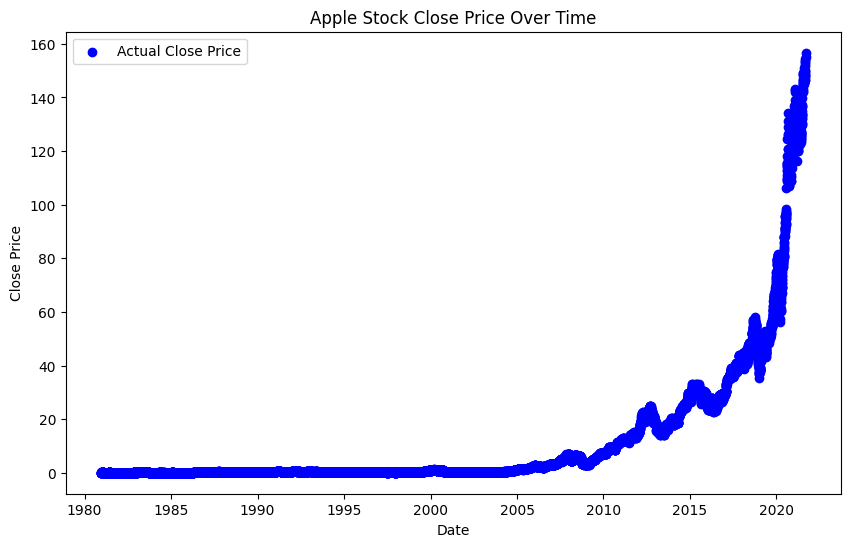

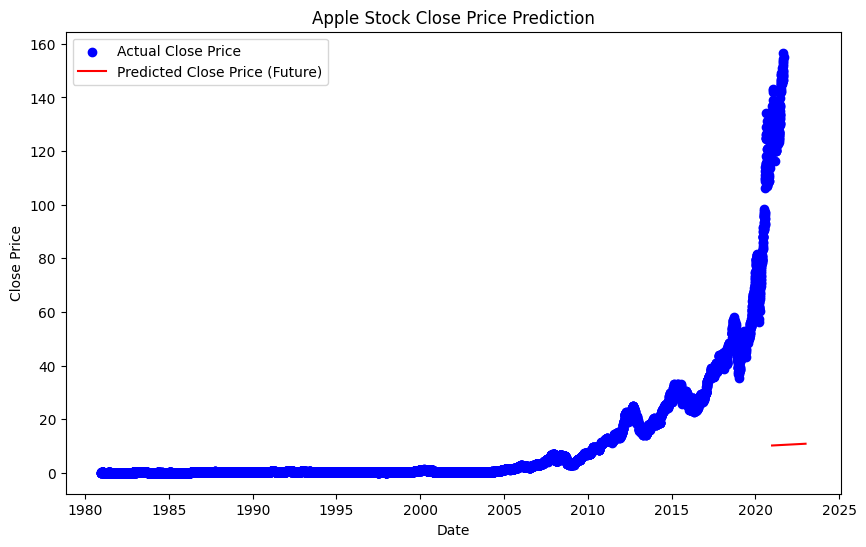

In [ ]:

# Load the dataset
data = pd.read_csv('/content/AAPL.csv')

# Considering 'Date' and 'Close' columns for simplicity
data = data[['Date', 'Close']]

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Optional: Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(data['Date'], data['Close'], color='blue', label='Actual Close Price')
plt.title('Apple Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Prepare data for linear regression
data['Timestamp'] = (data['Date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
X = data['Timestamp'].values.reshape(-1, 1)
y = data['Close'].values

# Splitting data into training and testing sets
split = int(len(data) * 0.8)  # 80% train, 20% test
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting future stock prices
future_dates = pd.date_range(start='2021-01-01', end='2023-01-01')  # Define future dates for prediction
future_timestamps = (future_dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
future_timestamps = future_timestamps.values.reshape(-1, 1)
future_predictions = model.predict(future_timestamps)

# Visualize future predictions
plt.figure(figsize=(10, 6))
plt.scatter(data['Date'], data['Close'], color='blue', label='Actual Close Price')
plt.plot(future_dates, future_predictions, color='red', label='Predicted Close Price (Future)')
plt.title('Apple Stock Close Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


##Long Short-Term Memory (LSTM) model

Epoch 1/10
256/256 [==============================] - 19s 60ms/step - loss: 2.0856e-05
Epoch 2/10
256/256 [==============================] - 14s 54ms/step - loss: 3.5552e-06
Epoch 3/10
256/256 [==============================] - 14s 54ms/step - loss: 2.8319e-06
Epoch 4/10
256/256 [==============================] - 14s 54ms/step - loss: 2.8356e-06
Epoch 5/10
256/256 [==============================] - 15s 57ms/step - loss: 2.8598e-06
Epoch 6/10
256/256 [==============================] - 16s 62ms/step - loss: 2.4749e-06
Epoch 7/10
256/256 [==============================] - 14s 54ms/step - loss: 2.3845e-06
Epoch 8/10
256/256 [==============================] - 14s 54ms/step - loss: 2.3147e-06
Epoch 9/10
256/256 [==============================] - 14s 54ms/step - loss: 2.0840e-06
Epoch 10/10
63/63 [==============================] - 2s 15ms/step


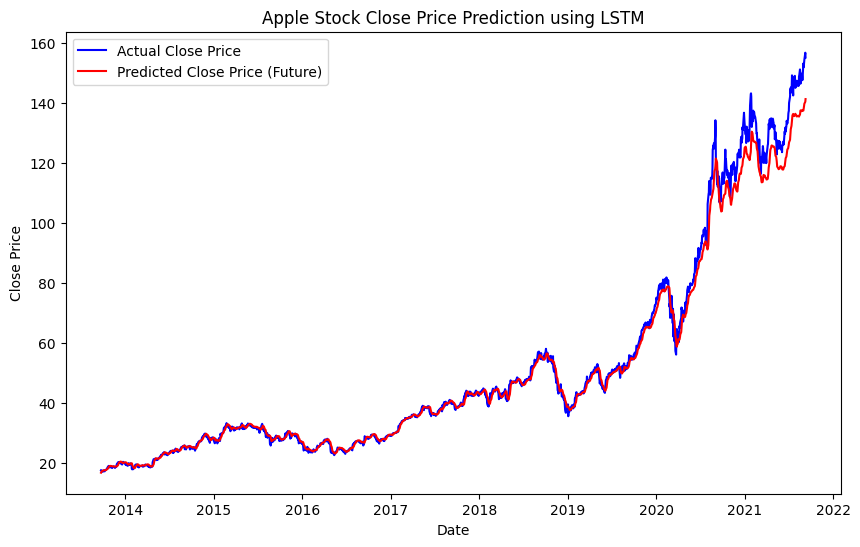

In [200]:
# Load the dataset
data = pd.read_csv('/content/AAPL.csv')  # Replace 'your_dataset.csv' with your file path

# Considering 'Date' and 'Close' columns for simplicity
data = data[['Date', 'Close']]

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Function to create sequences for LSTM model
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

# Set sequence length and split data into train and test sets
sequence_length = 50
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size, :]
test_data = scaled_data[train_size:, :]

# Create sequences for training
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Reshape data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile model
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='mean_squared_error')

# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict future stock prices
predicted_stock_prices = model.predict(X_test)
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices)

# Visualize future predictions
plt.figure(figsize=(10, 6))
plt.plot(data['Date'][train_size + sequence_length:], data['Close'][train_size + sequence_length:], color='blue', label='Actual Close Price')
plt.plot(data['Date'][train_size + sequence_length:], predicted_stock_prices, color='red', label='Predicted Close Price (Future)')
plt.title('Apple Stock Close Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
pip install statsmodels

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the 

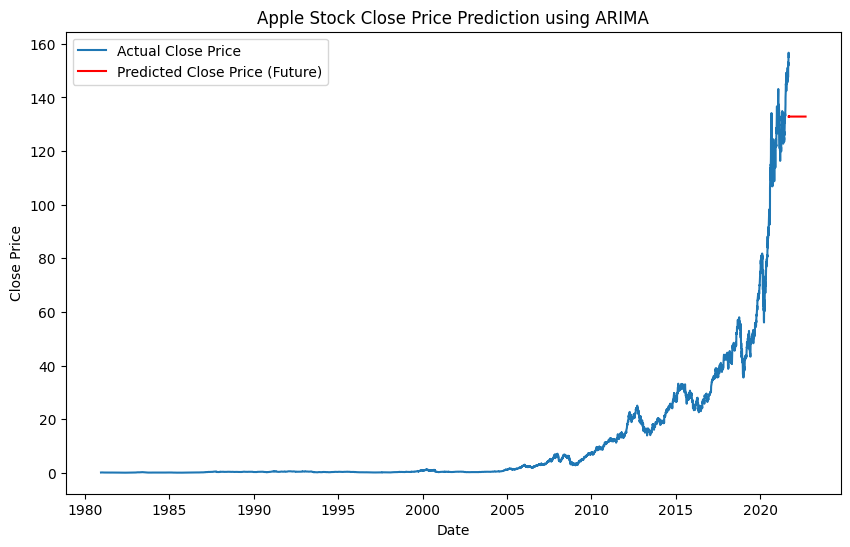

In [206]:

# Load the dataset
data = pd.read_csv('/content/AAPL.csv')

data = data[['Date', 'Close']]
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Use data up to 2020 for training
train_data = data[data.index.year <= 2020]['Close']

# Fit ARIMA model
model = ARIMA(train_data, order=(5, 1, 0))  # ARIMA(p, d, q) where p=5, d=1, q=0
results = model.fit()

# Forecast future stock prices
forecast = results.forecast(steps=365)  # Predicting for 1 year (365 days) into the future

# Generate future date range for plotting
future_dates = pd.date_range(start=data.index[-1], periods=366, freq='D')[1:]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Actual Close Price')
plt.plot(future_dates, forecast, color='red', label='Predicted Close Price (Future)')
plt.title('Apple Stock Close Price Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


**Conclusions:**

There's some patterns in apple stocks and volume history, it seems to be the best idea to buy stock at the begging of the decade (for example) now and then sell it at the end of the next. But there's a lot of time, anyway apple stocks generally have increasing tendency so maybe You should consider buying it...